In [565]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [566]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [567]:
z = open('/content/gdrive/MyDrive/hw2/data/kmeans_data.txt')

In [568]:
train=z.read().split()

In [569]:
x_train = np.zeros(len(train))

In [570]:
for i in range(len(x_train)):
  x_train[i] = train[i]

In [571]:
z.close()

In [572]:
x_train.shape

(2024,)

In [573]:
x_train = x_train.reshape(len(x_train)//2,2)

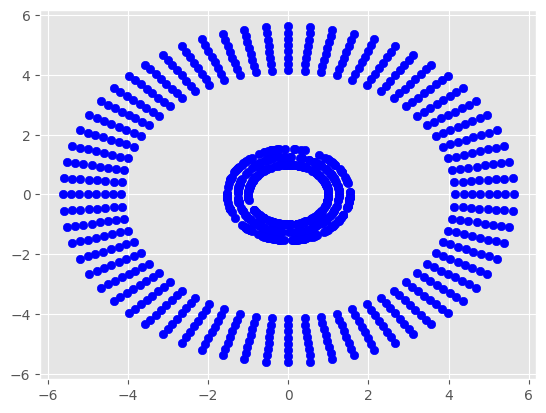

In [574]:
plt.scatter(np.transpose(x_train)[0], np.transpose(x_train)[1], c='b')

In [575]:
sqsum = np.zeros((x_train.shape[0],1))

In [576]:
for i in range(x_train.shape[0]):
  sqsum[i] = x_train[i][0]**2 + x_train[i][1]**2

In [577]:
init_loc = sqsum[:2,:]

In [578]:
def pred_label(sqsum,init_loc):
  distance = np.zeros((sqsum.shape[0], init_loc.shape[0]))
  for i in range(init_loc.shape[0]):
    diff = sqsum - init_loc[i,:].reshape((1,-1))
    distance[:,i] = np.sum(np.square(diff), axis=1)
  label = np.argmin(distance, axis=1)
  return label

In [579]:
label = pred_label(sqsum,init_loc)

In [580]:
for iter in range(50):
  init_loc = np.zeros((2, sqsum.shape[1]))
  init_loc[0,:] = np.mean(sqsum[label==0], axis=0)
  init_loc[1,:] = np.mean(sqsum[label==1], axis=0)
  label = pred_label(sqsum,init_loc)
  L1 = (label==0).reshape(label.shape[0])
  L2 = (label==1).reshape(label.shape[0])

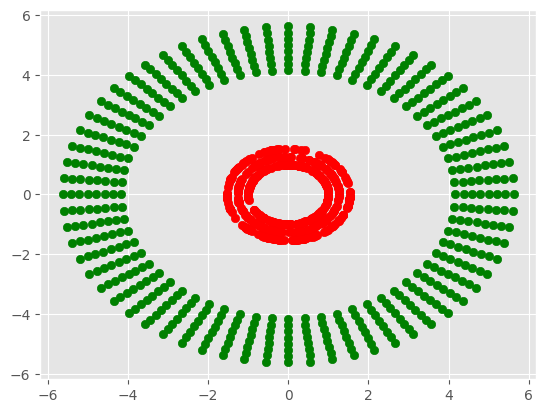

In [581]:
plt.scatter(x_train[L1,0], x_train[L1,1], c='r')
plt.scatter(x_train[L2,0], x_train[L2,1], c='g')

In [582]:
def RBF(x, y):
  return np.exp(-0.1*np.sum(np.square(x - y.reshape((1,-1))), axis=1)).reshape(-1,1)

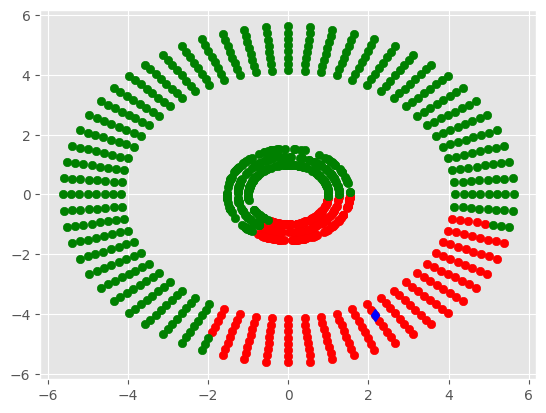

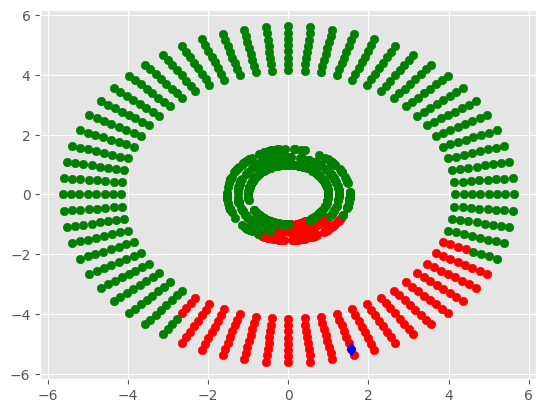

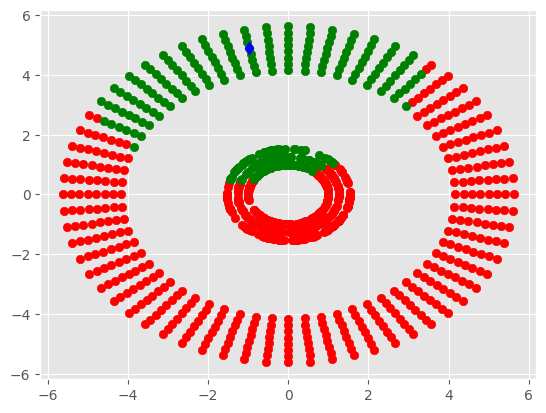

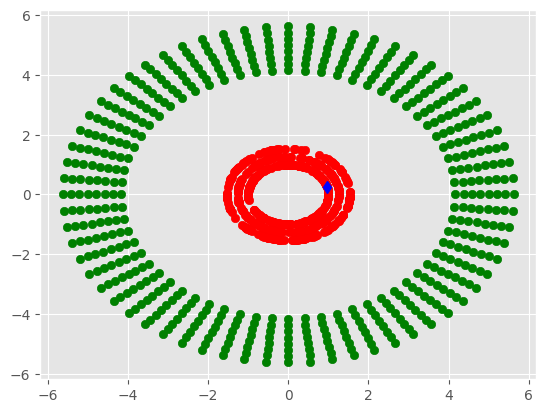

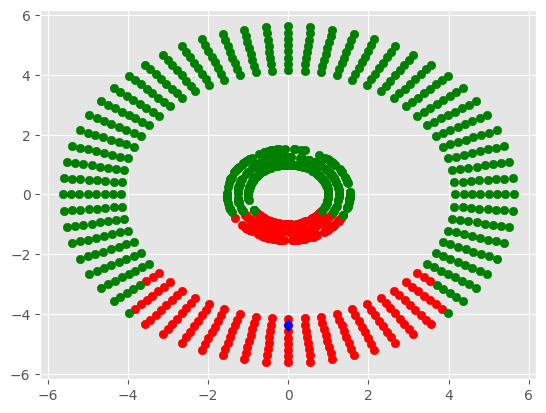

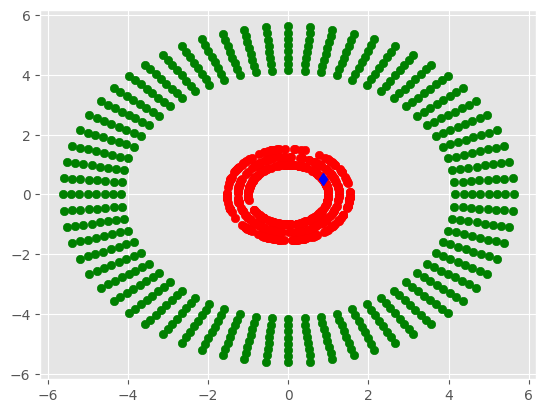

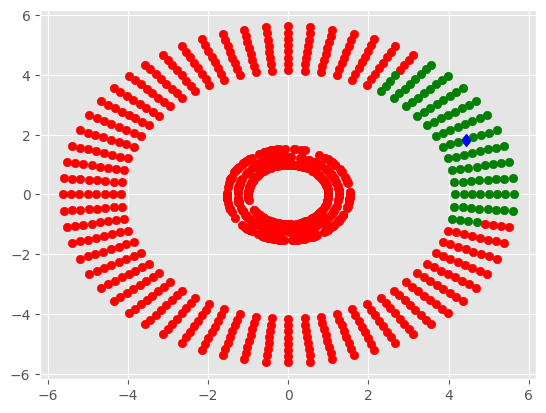

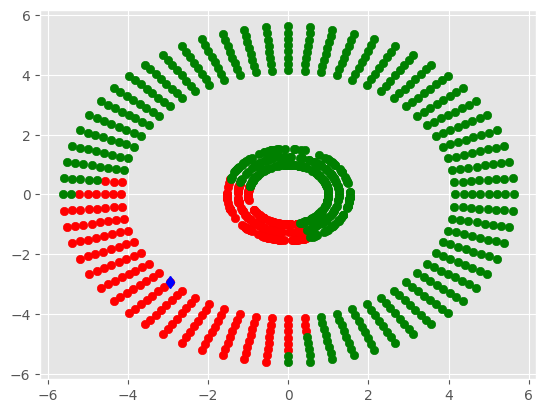

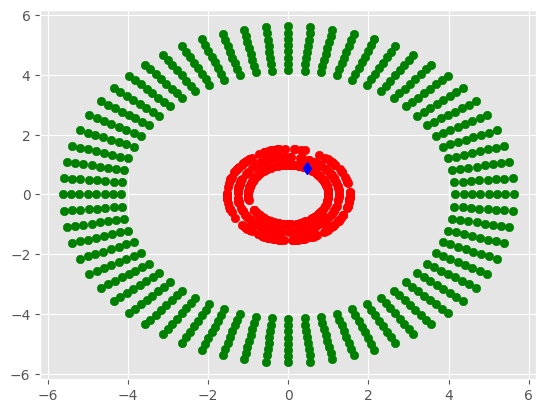

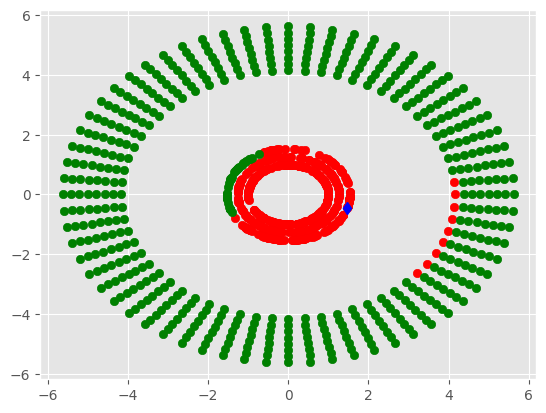

In [583]:
for k in range(10):
  rand = int(np.random.randint(x_train.shape[0], size=1))

  land = RBF(x_train, x_train[rand,:])
  init_loc = land[:2,:]
  label = pred_label(land, init_loc)

  init_loc = np.zeros((2, land.shape[1]))
  init_loc[0,:] = np.mean(land[label==0], axis=0)
  init_loc[1,:] = np.mean(land[label==1], axis=0)
  label = pred_label(land,init_loc)
  L1 = (label==0).reshape(label.shape[0])
  L2 = (label==1).reshape(label.shape[0])

  plt.figure(k)
  plt.scatter(x_train[L1,0], x_train[L1,1], c='r')
  plt.scatter(x_train[L2,0], x_train[L2,1], c='g')
  plt.plot(x_train[rand,0], x_train[rand,1], 'bd')